# 1 Project Overview

This will start with data wrangling and exploratory data analysis to visually observe of the effectiveness of various factors on the temperature-dependent mechanical properties.For this we obtain the data from our MD simulations


# 2 Data Wrangling

In [1]:
#first we import all the libraries we will use in this study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_validate
from sklearn.preprocessing import StandardScaler
#from library.sb_utils import save_file

# Modeling Libraries
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, SGDRegressor, PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# Evaluation & CV Libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Neural Network
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam

In [2]:
#read input file
data=pd.read_csv("../Data/analysis.csv",index_col=0)
data["pore volume"]=1-data["real_volume_ratio"]

# Modeling

# 1 output variable and 5 input variable

In [3]:
prop=['precipitate_number','T', 'mean_radius', 'large_to_low_ratio',"pore volume"]
l1=[col for col in data.columns if col not in prop]
#print(l1)
x_1=data.drop(l1,axis=1)
#print(x_1.head())

y_1=data[["elastic_modulous"]] #[features]

#y=y.reset_index(drop=True)
#print(y)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(x_train_1)
x_train_1 = scaler.transform(x_train_1)
x_test_1 = scaler.transform(x_test_1)

In [1]:
#Create the layers
n=5 #neuron
input_layer=Input(shape=(5,),name='input_layer')
layer_1=Dense(n,activation="linear",name='layer_1')(input_layer)
layer_2=Dense(n,activation="linear",name='layer_2')(layer_1)

#1st output
y1_output=Dense(1,activation="linear",name='y1_output')(layer_2)

#Define the model
model_1=Model(inputs=input_layer,outputs=y1_output)#[,y3_output]

#MSummary of Model
model_1.summary()

NameError: name 'Input' is not defined

In [ ]:
## defining the optimiser and loss function
model_1.compile(optimizer='adam', loss={'y1_output':'mse'}) #,'y3_output':'mse'

##train the model
history_1=model_1.fit(x_train_1,y_train_1,epochs=1000, batch_size=128, validation_data=(x_test_1,y_test_1))

4/4 [==============================] - 0s 3ms/step - loss: 10.0538


Text(0.5, 0, 'epochs')

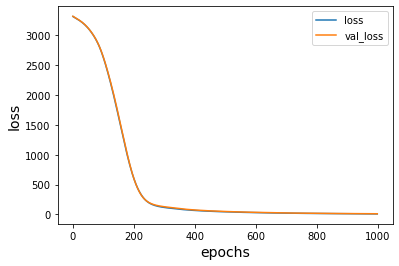

In [6]:
# Evalute the Model
model_1.evaluate(x_test_1, y_test_1)

# Plot loss VS epochs graph
pd.DataFrame(history_1.history).plot()
plt.ylabel('loss', fontsize=14)
plt.xlabel('epochs', fontsize=14)

In [7]:
predictions = model_1.predict(x_test_1)

4/4 [==============================] - 4s 4ms/step


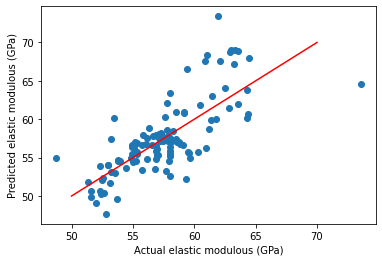

In [8]:
plt.scatter(y_test_1["elastic_modulous"],predictions ) #pred_2
plt.xlabel('Actual elastic modulous (GPa)')
plt.ylabel('Predicted elastic modulous (GPa)')
plt.plot([50,70],[50,70],marker=None,color="red")

# 2 output variable and 5 input variable

In [9]:
prop=['precipitate_number','T', 'mean_radius', 'large_to_low_ratio', 'pore volume']
l1=[col for col in data.columns if col not in prop]

x_2=data.drop(l1,axis=1)

y_2=data[["elastic_modulous","stress_yield",""]] #[features]

#y=y.reset_index(drop=True)
#print(y)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(x_train_2)
x_train_2 = scaler.transform(x_train_2)
x_test_2 = scaler.transform(x_test_2)
#print(x_test_2)

In [10]:
#Create the layers
n=5 #neuron
input_layer=Input(shape=(5,),name='input_layer')
layer_1=Dense(n,activation="relu",name='layer_1')(input_layer)
layer_2=Dense(n,activation="relu",name='layer_2')(layer_1)

#1st output
y1_output=Dense(2,activation="linear",name='y1_output')(layer_2)

#Define the model
model_2=Model(inputs=input_layer,outputs=y1_output)#[,y3_output]

#MSummary of Model
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 5)]               0         
                                                                 
 layer_1 (Dense)             (None, 5)                 30        
                                                                 
 layer_2 (Dense)             (None, 5)                 30        
                                                                 
 y1_output (Dense)           (None, 2)                 12        
                                                                 
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


In [11]:
## defining the optimiser and loss function
model_2.compile(optimizer='adam', loss='mse') #,'y3_output':'mse'

##train the model
history_2=model_2.fit(x_train_2,y_train_2,epochs=1000, batch_size=128, validation_data=(x_test_2,y_test_2))

Epoch 1/1000
4/4 [==============================] - 1s 76ms/step - loss: 1672.3311 - val_loss: 1676.5415
Epoch 2/1000
4/4 [==============================] - 0s 19ms/step - loss: 1671.6361 - val_loss: 1675.7782
Epoch 3/1000
4/4 [==============================] - 0s 18ms/step - loss: 1670.9486 - val_loss: 1675.0372
Epoch 4/1000
4/4 [==============================] - 0s 20ms/step - loss: 1670.2994 - val_loss: 1674.3007
Epoch 5/1000
4/4 [==============================] - 0s 22ms/step - loss: 1669.6555 - val_loss: 1673.5891
Epoch 6/1000
4/4 [==============================] - 0s 17ms/step - loss: 1669.0381 - val_loss: 1672.8936
Epoch 7/1000
4/4 [==============================] - 0s 15ms/step - loss: 1668.4324 - val_loss: 1672.2087
Epoch 8/1000
4/4 [==============================] - 0s 19ms/step - loss: 1667.8381 - val_loss: 1671.5393
Epoch 9/1000
4/4 [==============================] - 0s 18ms/step - loss: 1667.2546 - val_loss: 1670.8781
Epoch 10/1000
4/4 [==============================] - 0s

Epoch 156/1000
4/4 [==============================] - 0s 18ms/step - loss: 327.6809 - val_loss: 297.5654
Epoch 157/1000
4/4 [==============================] - 0s 20ms/step - loss: 320.5445 - val_loss: 291.0045
Epoch 158/1000
4/4 [==============================] - 0s 23ms/step - loss: 313.6541 - val_loss: 284.6172
Epoch 159/1000
4/4 [==============================] - 0s 25ms/step - loss: 306.7942 - val_loss: 278.4515
Epoch 160/1000
4/4 [==============================] - 0s 36ms/step - loss: 300.1272 - val_loss: 272.4890
Epoch 161/1000
4/4 [==============================] - 0s 46ms/step - loss: 293.7385 - val_loss: 266.6451
Epoch 162/1000
4/4 [==============================] - 0s 41ms/step - loss: 287.4850 - val_loss: 260.9182
Epoch 163/1000
4/4 [==============================] - 0s 24ms/step - loss: 281.2448 - val_loss: 255.3491
Epoch 164/1000
4/4 [==============================] - 0s 22ms/step - loss: 275.2820 - val_loss: 249.8701
Epoch 165/1000
4/4 [==============================] - 0

4/4 [==============================] - 0s 41ms/step - loss: 53.5346 - val_loss: 58.7325
Epoch 314/1000
4/4 [==============================] - 0s 25ms/step - loss: 53.2254 - val_loss: 58.4596
Epoch 315/1000
4/4 [==============================] - 0s 23ms/step - loss: 52.9325 - val_loss: 58.1884
Epoch 316/1000
4/4 [==============================] - 0s 26ms/step - loss: 52.6275 - val_loss: 57.9214
Epoch 317/1000
4/4 [==============================] - 0s 22ms/step - loss: 52.3154 - val_loss: 57.6648
Epoch 318/1000
4/4 [==============================] - 0s 26ms/step - loss: 52.0198 - val_loss: 57.4054
Epoch 319/1000
4/4 [==============================] - 0s 25ms/step - loss: 51.7274 - val_loss: 57.1385
Epoch 320/1000
4/4 [==============================] - 0s 21ms/step - loss: 51.4461 - val_loss: 56.8804
Epoch 321/1000
4/4 [==============================] - 0s 34ms/step - loss: 51.1436 - val_loss: 56.6196
Epoch 322/1000
4/4 [==============================] - 0s 20ms/step - loss: 50.8579 - val

4/4 [==============================] - 0s 15ms/step - loss: 24.1932 - val_loss: 31.1619
Epoch 472/1000
4/4 [==============================] - 0s 16ms/step - loss: 24.0860 - val_loss: 31.0448
Epoch 473/1000
4/4 [==============================] - 0s 18ms/step - loss: 23.9778 - val_loss: 30.9378
Epoch 474/1000
4/4 [==============================] - 0s 18ms/step - loss: 23.8715 - val_loss: 30.8162
Epoch 475/1000
4/4 [==============================] - 0s 17ms/step - loss: 23.7600 - val_loss: 30.7018
Epoch 476/1000
4/4 [==============================] - 0s 17ms/step - loss: 23.6560 - val_loss: 30.5947
Epoch 477/1000
4/4 [==============================] - 0s 17ms/step - loss: 23.5506 - val_loss: 30.4798
Epoch 478/1000
4/4 [==============================] - 0s 20ms/step - loss: 23.4380 - val_loss: 30.3631
Epoch 479/1000
4/4 [==============================] - 0s 16ms/step - loss: 23.3307 - val_loss: 30.2521
Epoch 480/1000
4/4 [==============================] - 0s 18ms/step - loss: 23.2213 - val

4/4 [==============================] - 0s 15ms/step - loss: 11.1634 - val_loss: 14.9181
Epoch 630/1000
4/4 [==============================] - 0s 13ms/step - loss: 11.1047 - val_loss: 14.8280
Epoch 631/1000
4/4 [==============================] - 0s 12ms/step - loss: 11.0440 - val_loss: 14.7474
Epoch 632/1000
4/4 [==============================] - 0s 13ms/step - loss: 10.9832 - val_loss: 14.6812
Epoch 633/1000
4/4 [==============================] - 0s 14ms/step - loss: 10.9231 - val_loss: 14.6223
Epoch 634/1000
4/4 [==============================] - 0s 13ms/step - loss: 10.8617 - val_loss: 14.5638
Epoch 635/1000
4/4 [==============================] - 0s 27ms/step - loss: 10.8029 - val_loss: 14.4880
Epoch 636/1000
4/4 [==============================] - 0s 14ms/step - loss: 10.7440 - val_loss: 14.4215
Epoch 637/1000
4/4 [==============================] - 0s 11ms/step - loss: 10.6871 - val_loss: 14.3524
Epoch 638/1000
4/4 [==============================] - 0s 10ms/step - loss: 10.6266 - val

4/4 [==============================] - 0s 22ms/step - loss: 4.2629 - val_loss: 5.7944
Epoch 791/1000
4/4 [==============================] - 0s 18ms/step - loss: 4.2379 - val_loss: 5.7669
Epoch 792/1000
4/4 [==============================] - 0s 24ms/step - loss: 4.2152 - val_loss: 5.7336
Epoch 793/1000
4/4 [==============================] - 0s 18ms/step - loss: 4.1931 - val_loss: 5.6942
Epoch 794/1000
4/4 [==============================] - 0s 19ms/step - loss: 4.1685 - val_loss: 5.6641
Epoch 795/1000
4/4 [==============================] - 0s 17ms/step - loss: 4.1468 - val_loss: 5.6324
Epoch 796/1000
4/4 [==============================] - 0s 22ms/step - loss: 4.1230 - val_loss: 5.5969
Epoch 797/1000
4/4 [==============================] - 0s 16ms/step - loss: 4.1007 - val_loss: 5.5699
Epoch 798/1000
4/4 [==============================] - 0s 20ms/step - loss: 4.0770 - val_loss: 5.5421
Epoch 799/1000
4/4 [==============================] - 0s 20ms/step - loss: 4.0561 - val_loss: 5.5123
Epoch

4/4 [==============================] - 0s 19ms/step - loss: 2.1528 - val_loss: 2.9512
Epoch 953/1000
4/4 [==============================] - 0s 21ms/step - loss: 2.1450 - val_loss: 2.9380
Epoch 954/1000
4/4 [==============================] - 0s 19ms/step - loss: 2.1360 - val_loss: 2.9313
Epoch 955/1000
4/4 [==============================] - 0s 19ms/step - loss: 2.1278 - val_loss: 2.9215
Epoch 956/1000
4/4 [==============================] - 0s 30ms/step - loss: 2.1192 - val_loss: 2.9157
Epoch 957/1000
4/4 [==============================] - 0s 21ms/step - loss: 2.1110 - val_loss: 2.9056
Epoch 958/1000
4/4 [==============================] - 0s 21ms/step - loss: 2.1037 - val_loss: 2.8976
Epoch 959/1000
4/4 [==============================] - 0s 25ms/step - loss: 2.0950 - val_loss: 2.8863
Epoch 960/1000
4/4 [==============================] - 0s 16ms/step - loss: 2.0877 - val_loss: 2.8797
Epoch 961/1000
4/4 [==============================] - 0s 16ms/step - loss: 2.0792 - val_loss: 2.8726
Epoch

4/4 [==============================] - 0s 4ms/step - loss: 2.5461


Text(0.5, 0, 'epochs')

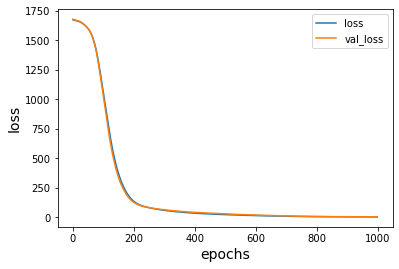

In [12]:
# Evalute the Model
model_2.evaluate(x_test_2, y_test_2)

# Plot loss VS epochs graph
pd.DataFrame(history_2.history).plot()
plt.ylabel('loss', fontsize=14)
plt.xlabel('epochs', fontsize=14)

In [18]:
predictions_2 = model_2.predict(x_test_2)
pred_1=predictions_2[:,0]
pred_2=predictions_2[:,1]
#pred_3=predictions[2]
print(pred_1 )

4/4 [==============================] - 0s 2ms/step
[54.310047 52.933517 56.70191  57.504913 58.529392 57.1309   58.216705
 53.039165 58.683712 56.65006  61.409603 56.413662 54.78392  59.826794
 62.414745 57.174618 57.032364 53.47145  57.635372 57.483166 63.64165
 58.117107 55.309895 58.03782  63.998425 52.98321  57.073856 60.72591
 56.963665 50.96143  61.000366 62.685272 61.49623  62.829975 54.62241
 58.667168 53.327488 54.68165  57.435425 64.747116 63.994186 54.400597
 55.29213  57.948086 58.62391  54.33334  57.4573   53.045425 52.323826
 61.547318 53.040546 53.914303 55.70325  56.012142 54.617397 59.853977
 50.942955 54.386993 58.811718 56.481827 50.86583  52.850872 59.30874
 54.596962 58.496223 61.12957  54.855545 54.587135 57.467873 64.28784
 60.40573  58.625427 54.308147 53.857807 57.965683 58.38363  55.873344
 51.12688  55.08645  53.43912  58.795166 57.172466 59.03077  61.708748
 59.34245  58.594856 61.17558  57.221638 56.541874 59.234524 57.72501
 55.476826 60.016575 59.546745 5

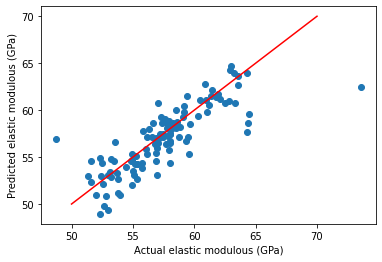

In [19]:
plt.scatter(y_test_2["elastic_modulous"],pred_1 ) #pred_2
plt.xlabel('Actual elastic modulous (GPa)')
plt.ylabel('Predicted elastic modulous (GPa)')
plt.plot([50,70],[50,70],marker=None,color="red")

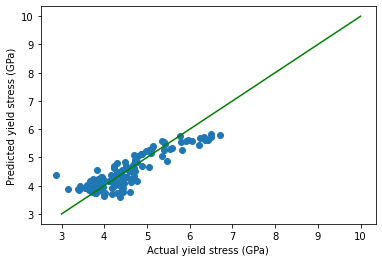

In [20]:
plt.scatter(y_test_2["stress_yield"],pred_2)
plt.xlabel('Actual yield stress (GPa)')
plt.ylabel('Predicted yield stress (GPa)')
plt.plot([3,10],[3,10],marker=None,color="green")